In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter
color_sns = sns.cubehelix_palette(8, start=.5, rot=-.75)

In [5]:
path = os.getcwd()
base = path.split('/')[:-2]
base_path = '/'.join(base)


In [6]:
def plot_fsst(cr, ra, leco_cr, leco_ra, dataset, setsize):
    plt.figure(figsize=(4.5, 3))
    plt.plot(ra, cr,marker='v', label = 'FSST', c='seagreen',ms=8, ls='--')
    plt.scatter(leco_ra, leco_cr, label = 'LeCo', c='sandybrown',s=50)
    for i in range(len(leco_ra)):
        plt.annotate(setsize[i], xy = (leco_ra[i], leco_cr[i]), xytext = (leco_ra[i]-16+i*15, leco_cr[i]-11), fontsize=14)
    plt.ylim([0, max(cr)+5])
    plt.xlim([0, max(ra)+10])
    plt.xlabel('Random Access(ns)',fontsize=15)
    plt.title(dataset,fontsize=20)
    plt.tight_layout()
    plt.savefig('String_'+str(dataset)+'.pdf',dpi=500, transparent=True)
    plt.show()

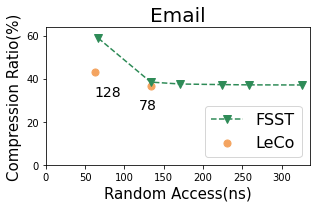

In [101]:
cr= [58.786,38.3979,37.5044,37.2284,37.1105,37.0537]
ra = [66.7324,133.434,170.754,224.739,258.544,325.564]
leco_cr=[36.68, 42.94]
leco_ra = [134.3327,62.982776]
plot_fsst(cr,ra, leco_cr, leco_ra, 'Email', [78,128])

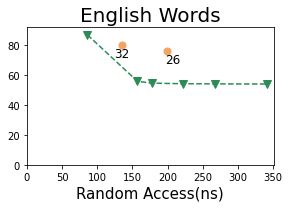

In [21]:
cr= [87.0016,55.9173,54.6782,54.2841,54.182,54.0897]
ra = [85.9518,157.103,177.231,221.599,267.004,340.661]
leco_cr=[80.29,76.29]
leco_ra = [134.67098,199.42741]
plot_fsst(cr,ra, leco_cr, leco_ra, 'English Words',[32, 26])

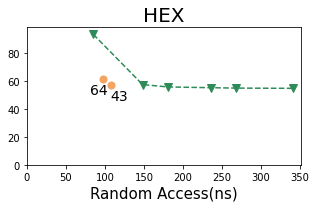

In [103]:
cr= [93.1003,57.2789,55.5998,55.0403,54.7603,54.5923]
ra = [85.1523,148.255,180.323,236.128,268.327,340.673]
leco_cr=[61.44, 57.07]
leco_ra = [96.928406,107.6889]
plot_fsst(cr,ra, leco_cr, leco_ra, 'HEX',[64, 43])

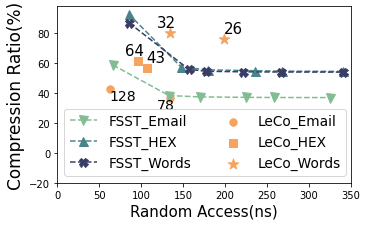

In [205]:
cr= [58.786,38.3979,37.5044,37.2284,37.1105,37.0537]
ra = [66.7324,133.434,170.754,224.739,258.544,325.564]
leco_cr=[36.68, 42.94]
leco_ra = [134.3327,62.982776]
setsize = [78,128]
plt.figure(figsize=(5.2, 3.25))
plt.plot(ra, cr,marker='v', label = 'FSST_Email', c=color_sns[2],ms=9, ls='--')
plt.scatter(leco_ra, leco_cr, label = 'LeCo_Email', c='sandybrown',s=55)
for i in range(len(leco_ra)):
    plt.annotate(setsize[i], xy = (leco_ra[i], leco_cr[i]), xytext = (leco_ra[i]-16+i*15, leco_cr[i]-7.5), fontsize=14)
    
cr= [93.1003,57.2789,55.5998,55.0403,54.7603,54.5923]
ra = [85.1523,148.255,180.323,236.128,268.327,340.673]
leco_cr=[61.44, 57.07]
leco_ra = [96.928406,107.6889]
setsize = [64, 43]
plt.plot(ra, cr,marker='^', label = 'FSST_HEX', c=color_sns[4],ms=9, ls='--')
plt.scatter(leco_ra, leco_cr, label = 'LeCo_HEX', c='sandybrown',s=55,marker='s')
for i in range(len(leco_ra)):
    plt.annotate(setsize[i], xy = (leco_ra[i], leco_cr[i]), xytext = (leco_ra[i]-16+i*15, leco_cr[i]+4), fontsize=15)

plt.ylim([-20, max(cr)+5])
plt.xlim([0, max(ra)+10])
cr= [87.0016,55.9173,54.6782,54.2841,54.182,54.0897]
ra = [85.9518,157.103,177.231,221.599,267.004,340.661]
leco_cr=[80.29,76.29]
leco_ra = [134.67098,199.42741]
setsize = [32, 26]
plt.plot(ra, cr,marker='X', label = 'FSST_Words', c=color_sns[6],ms=9, ls='--')
plt.scatter(leco_ra, leco_cr, label = 'LeCo_Words', c='sandybrown',s=120,marker='*')
for i in range(len(leco_ra)):
    plt.annotate(setsize[i], xy = (leco_ra[i], leco_cr[i]), xytext = (leco_ra[i]-16+i*15, leco_cr[i]+4), fontsize=15)
    
    
    
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,2,4,1,3,5]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=13.8, ncol=2) 

plt.xlabel('Random Access(ns)',fontsize=15)
plt.ylabel('Compression Ratio(%)',fontsize=17)
# plt.title(dataset,fontsize=20)
# plt.legend(fontsize=13.8, ncol=2)
plt.tight_layout()
plt.savefig('String_combine.pdf',dpi=500, transparent=True)
plt.show()

In [202]:
methods = ['RNS','FOR_my','Elias-Fano','delta_my','delta_cost','piecewise_fix_op_max','leco_cost','Poly_fix_op_max','poly_cost']

In [203]:
fix_int = pd.read_csv(base_path+'/benchmark/fix_int_benchmark_intel_new.log')

In [204]:
fix_int_filter = fix_int.loc[fix_int['method'].isin(methods)]

In [300]:
auto_int = pd.read_csv(base_path+'/benchmark/auto_int_benchmark_intel.log')
gre_result = pd.read_csv(base_path+'/benchmark/bench_gre.log',delimiter=',')
gre_result_auto = pd.read_csv(base_path+'/benchmark/bench_gre_auto.log',delimiter=',')

In [208]:
total = pd.concat([fix_int_filter, auto_int,gre_result,gre_result_auto],axis = 0)

# Random Access

In [209]:
def process_plot_data(plot_dataset, methods, total, attribute):
    data = []
    for codec in methods:
        test = total.loc[total['method'] == codec]
        for dataset in plot_dataset:
            data_cols = test.loc[test['dataset']==dataset][attribute]
            data.append(data_cols)
    return data

In [210]:
font1 = {
#          'weight': 'bold',
         'style':'normal',
         'size': 40,
         }
def create_multi_bars(labels, datas, tick_step=1.5, group_gap=0.18, bar_gap=0):
    codec = ['rANS','FOR','Elias-Fano','Delta','Delta_cost','Leco','Leco_cost']
    category_colors = ['slategray',color_sns[5],'steelblue',color_sns[3],color_sns[1],'sandybrown','peachpuff','orange']
#     category_colors = ['steelblue','darkcyan','seagreen','darkseagreen','sandybrown','peachpuff']
#     category_colors = ['slategray','lightsteelblue','seagreen','darkseagreen','peru','sandybrown']
#     category_colors = ['steelblue','lightsteelblue','seagreen','darkseagreen','sandybrown','peachpuff']
    
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2
#     print(baseline_x, bar_span)
    plt.figure(figsize=(42, 5.4))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label =codec[index],color = category_colors[index] )
        for i in range(len(y)):
            if (index == 1 or index == 5):
                plt.text(baseline_x[i] + index*bar_span- bar_span/1.5,np.array(y)[i]+10, str(np.array(y)[i].astype(np.int64)),fontdict=font1)
           
            if np.array(y)[i]>250:
                if index ==0:
                    plt.text(baseline_x[i] + index*bar_span - bar_span/3 - 0.15,220, '%.1g' % np.array(y)[i].astype(np.int64),fontdict=font1)
                if index ==3:
                    plt.text(baseline_x[i] + index*bar_span - bar_span/2 - 0.1,180, str(np.array(y)[i].astype(np.int64)),fontdict=font1)
                if index ==4:
                    plt.text(baseline_x[i] + index*bar_span - bar_span/3 - 0.05,220, str(np.array(y)[i].astype(np.int64)),fontdict=font1)
    plt.axvline(x=6.75, c="grey", ls="--", lw=3)
    plt.axvline(x=9.75, c="grey", ls="--", lw=3)
    plt.axvline(x=15.75, c="grey", ls="--", lw=3)
    ax = plt.gca()
    ymajorLocator = MultipleLocator(100)
    ax.yaxis.set_major_locator(ymajorLocator)
    plt.xlim([min(baseline_x)-0.2, max(baseline_x)+1.5])
    plt.ylim([0, 250])
    plt.ylabel('Random Access(ns)',fontsize=37)
#     plt.legend(fontsize=24,ncol=6 )
    plt.yticks(fontsize=35)
    plt.xticks(ticks, labels, fontsize=30)

    plt.xticks([])
    plt.tight_layout()
    plt.savefig('RA_total.pdf', transparent=True)
    plt.show()
    


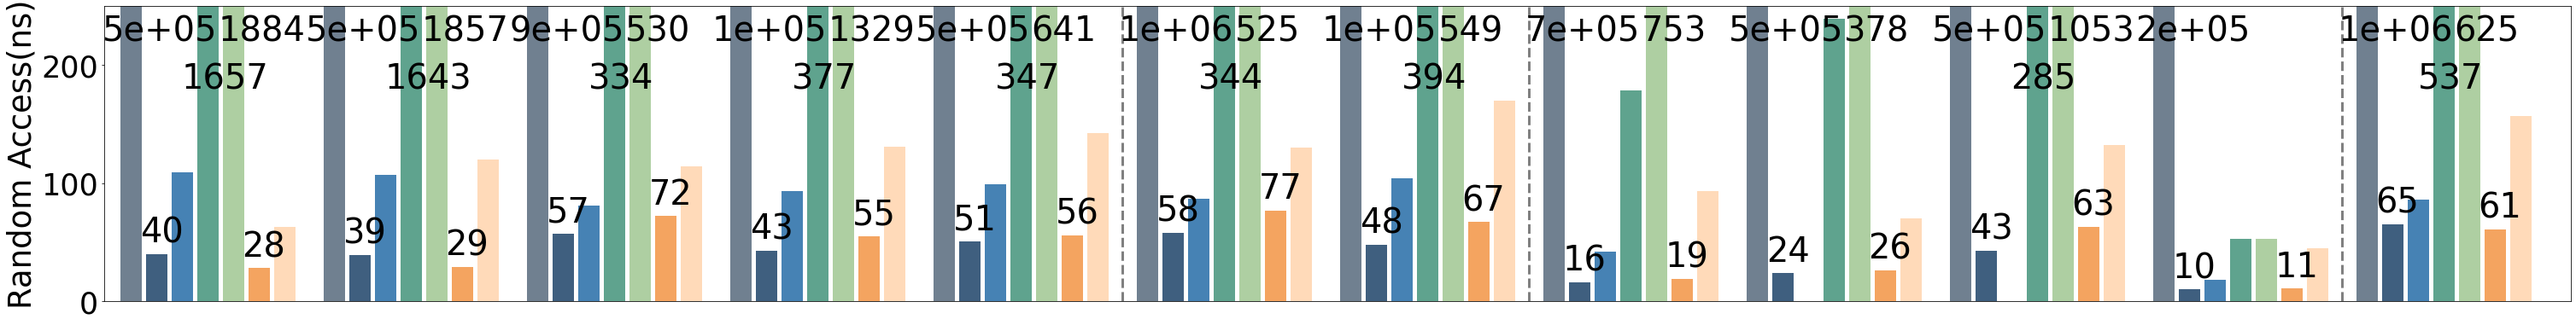

In [211]:
plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt','libio','wiki_200M_uint64','books_200M_uint32.txt','planet','fb_200M_uint64','ml_timestamp.txt','movieid.txt','poisson_randomdie.txt','house_price.txt','osm_cellids_200M_uint64']
label = ['linear','normal','libio','wiki','booksale','planet','facebook','ml','movieid','poisson','house_price','osm']
methods = ['RNS','FOR_my','Elias-Fano','delta_my','delta_cost','piecewise_fix_op_max','leco_cost']
data = process_plot_data(plot_dataset, methods, total,'ra_ns')
data = np.array(data)
for i in range(len(data)):
    data[i][0] = int(data[i][0])
data.resize([len(methods),len(plot_dataset)])
create_multi_bars(label, data, bar_gap=0.03)

# Compression Rate

In [212]:
def create_multi_bars_cr(labels, datas, tick_step=1.5, group_gap=0.18, bar_gap=0):
    codec = ['rANS','FOR','Elias-Fano','Delta','Delta-var','Leco','Leco-var']
    category_colors = ['slategray',color_sns[5],'steelblue',color_sns[3],color_sns[1],'sandybrown','peachpuff','orange']
#     category_colors = ['slategray',color_sns[5],color_sns[3],color_sns[1],'sandybrown','peachpuff']
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2 
    xhline_ind = 0.92 / len(labels)
    plt.figure(figsize=(50, 6))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y[0], bar_width, label=codec[index], color = category_colors[index] )
        plt.bar(baseline_x + index*bar_span, y[1], bar_width, bottom = y[0], hatch='xxx', color = category_colors[index])
        for i in range(len(y[0])):
            if np.array(y)[0][i]>65:
                plt.text(baseline_x[i] + index*bar_span- bar_span/2-0.06, 55, str(round(np.array(y)[0][i],1)),fontdict=font1)

#     for i in range(len(labels)):
#         plt.axhline(y=datas[-1][0][i], xmin= xhline_ind*i-0.16, xmax=xhline_ind*(i+1)-0.16, c="grey", ls="--", lw=1.5)
#     plt.ylim([0, max(datas[0][0])+2])
    plt.bar(0, 0, bar_width, bottom = 0, color = 'white',hatch='xxx',label = 'model size')
    for i in range(len(codec)):
            for j in range(len(labels)):
                if datas[i][0][j]+datas[i][1][j] > max(datas[0][0])+2:
                    plt.text(baseline_x[j] + i*bar_span - bar_span-0.05, max(datas[0][0])-2, str(datas[i][0][j]+datas[i][1][j]),fontsize = 33)
        
#     plt.bar(baseline_x + bar_span, 0, bar_width, color ='grey', label = 'model size')
    plt.axvline(x=6.75, c="grey", ls="--", lw=3)
    plt.axvline(x=9.75, c="grey", ls="--", lw=3)
    plt.axvline(x=15.75, c="grey", ls="--", lw=3)
    plt.ylabel('CPR Ratio(%)',fontsize=48)
    plt.legend(fontsize=45,ncol=9,bbox_to_anchor=(0,1.02,0.95,0.2),borderaxespad = 0.)
    ax = plt.gca()
    ymajorLocator = MultipleLocator(20)
    ax.yaxis.set_major_locator(ymajorLocator)
    plt.xlim([min(baseline_x)-0.2, max(baseline_x)+1.5])
    plt.yticks(fontsize=40)
    plt.ylim([0,65])
#     plt.xticks(ticks, labels, fontsize=30)
    plt.xticks([])
    plt.tight_layout()
    plt.savefig('CR_total.pdf',dpi=500, transparent=True)
    plt.show()
    

In [213]:
def process_cr(plot_dataset,methods,total):
    cr_delta = process_plot_data(plot_dataset, methods, total,['cr_delta'])
    cr_model = process_plot_data(plot_dataset, methods, total,['cr_model'])
    cr_array = np.array(cr_delta)
    cr_array.resize([len(methods),len(plot_dataset)])
    cr_array_model = np.array(cr_model)
    cr_array_model.resize([len(methods),len(plot_dataset)])
    total_cr = []
    for i in range(len(methods)):
        pair = [list(cr_array[i]),list(cr_array_model[i])]
        total_cr.append(pair)
    return total_cr

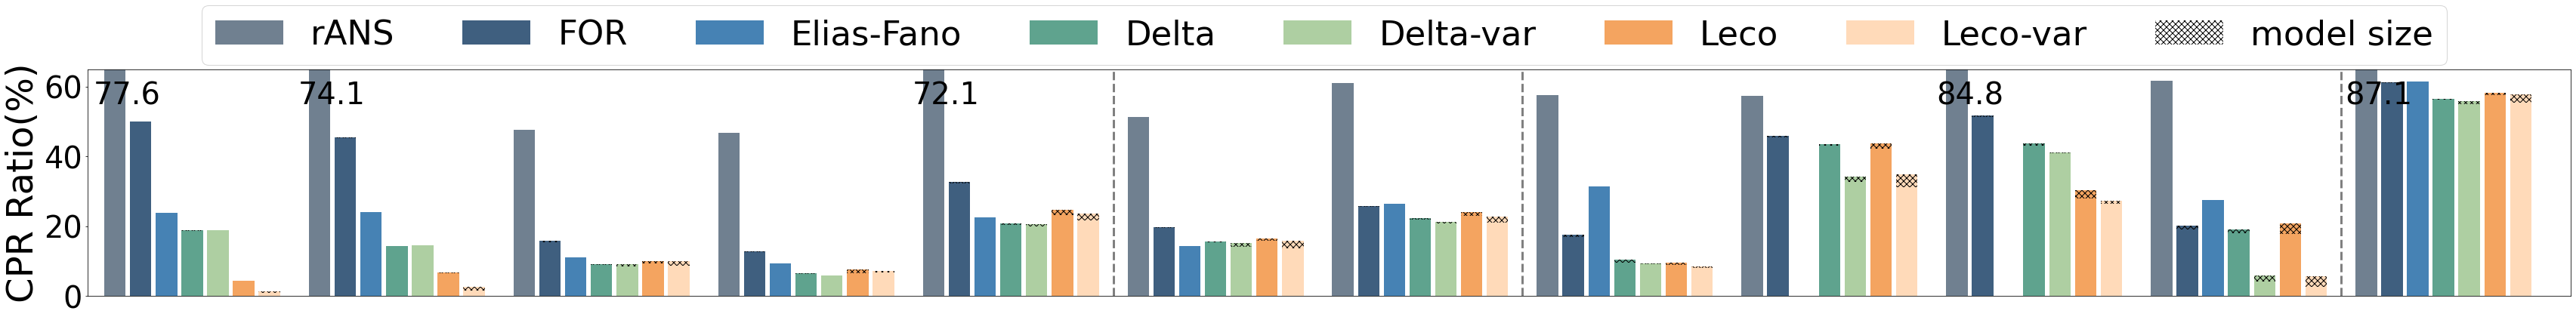

In [214]:
methods = ['RNS','FOR_my','Elias-Fano','delta_my','delta_cost','piecewise_fix_op_max','leco_cost']
total_cr =  process_cr(plot_dataset,methods,total)

create_multi_bars_cr(label, total_cr, bar_gap=0.03)

# Decompression Throughput

In [215]:
def create_multi_bars(labels, datas, tick_step=1.5, group_gap=0.15, bar_gap=0):
    codec = ['rANS','FOR','Elias-Fano','Delta','Delta_cost','Leco','Leco_cost','Leco_poly']
    category_colors = ['slategray',color_sns[5],'steelblue',color_sns[3],color_sns[1],'sandybrown','peachpuff','orange']
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2
    plt.figure(figsize=(42, 5.4))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label =codec[index],color = category_colors[index] )
        for i in range(len(y)):
            if np.array(y)[i]>4:
                plt.text(baseline_x[i] + index*bar_span -0.18,2.9, str(np.array(y)[i]),fontsize=37)
    plt.axvline(x=6.75, c="grey", ls="--", lw=3)
    plt.axvline(x=9.75, c="grey", ls="--", lw=3)
    plt.axvline(x=15.75, c="grey", ls="--", lw=3)
    plt.ylabel('Decode TPS(GB/s)',fontsize=37)
#     plt.legend(fontsize=20)
    plt.ylim([0,3.4])
    ax = plt.gca()
    ymajorLocator = MultipleLocator(1.0)
    ax.yaxis.set_major_locator(ymajorLocator)
    ymajorFormatter = FormatStrFormatter('%1.1f')
    ax.yaxis.set_major_formatter(ymajorFormatter)
#     ax.yaxis.tick_right()
    plt.xlim([min(baseline_x)-0.2, max(baseline_x)+1.5])
    plt.yticks(fontsize=33)
    plt.xticks(ticks, labels, fontsize=48)
    plt.tight_layout()
    plt.savefig('DT_total.pdf',dpi=500, transparent=True)
    plt.show()


<ipython-input-216-e97dcdc306e7>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if float(data[i])>=0.01:


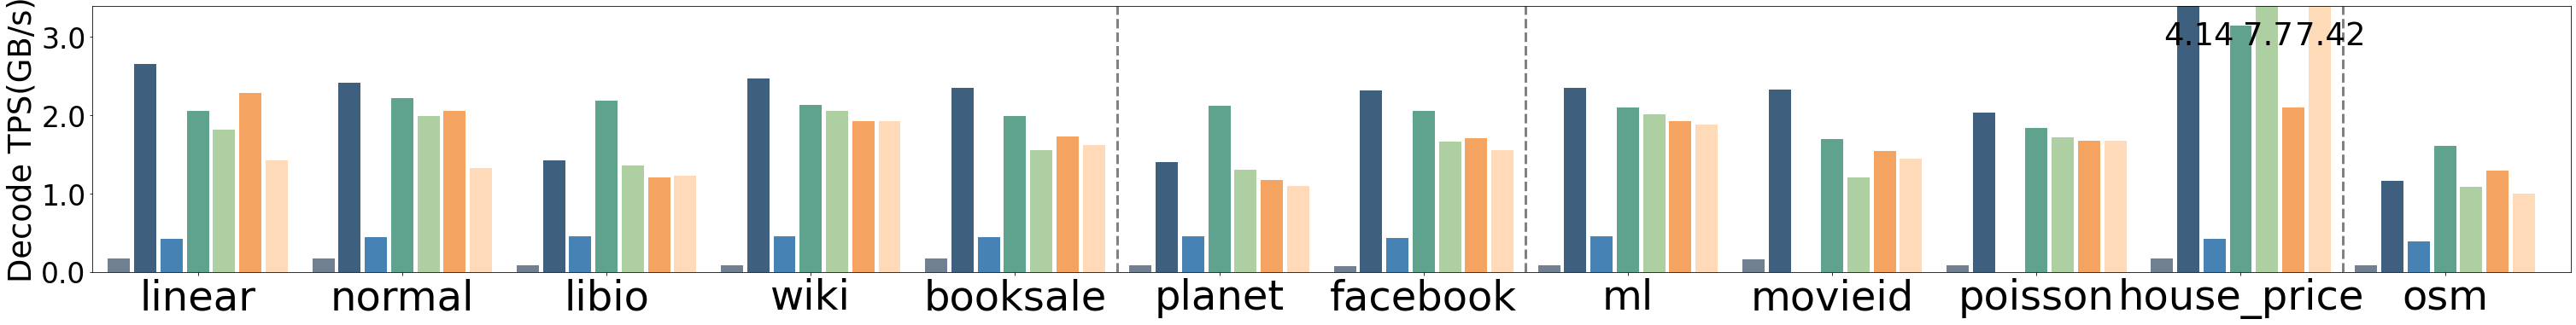

In [216]:
methods = ['RNS','FOR_my','Elias-Fano','delta_my','delta_cost','piecewise_fix_op_max','leco_cost']
data = process_plot_data(plot_dataset, methods, total,'da_ns')
for i in range(len(data)):
    if float(data[i])>=0.01:
        data[i] = 4 / data[i]
data = np.array(data)
for i in range(len(data)):
    data[i][0] = Decimal(data[i][0]).quantize(Decimal("0.00"))
data.resize([len(methods),len(plot_dataset)])
create_multi_bars(label, data, bar_gap=0.03)

In [219]:
data = process_plot_data(plot_dataset, ['leco_cost','piecewise_fix_op_max','FOR_my','Elias-Fano'], total,'da_ns')
for i in range(len(data)):
    if float(data[i])>=0.01:
        data[i] = 4 / data[i]
data = np.array(data)
for i in range(len(data)):
    data[i][0] = Decimal(data[i][0]).quantize(Decimal("0.00"))
data.resize([4,len(plot_dataset)])
dt_thr = []
for i in range(len(plot_dataset)):
    dt_thr.append(( max(data[2][i],data[3][i]) - max(data[1][i], data[1][i])) / max(data[2][i],data[3][i]))
dt_thr
    

<ipython-input-219-8e4bbbd29be7>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if float(data[i])>=0.01:


[0.142857142857143,
 0.14876033057851235,
 0.14788732394366194,
 0.22267206477732804,
 0.2638297872340426,
 0.16428571428571428,
 0.26293103448275856,
 0.1829787234042554,
 0.33905579399141633,
 0.17733990147783246,
 0.4927536231884057]

In [217]:
fix_method  = ['FOR_my','Elias-Fano','delta_my','piecewise_fix_op_max','leco_cost']
cr = []
ra = []
for codec in fix_method:
    
    plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt','poisson_randomdie.txt','ml_timestamp.txt','books_200M_uint32.txt','fb_200M_uint64','wiki_200M_uint64','movieid.txt','house_price.txt']
    size = [200000000, 200000000,100000000, 14057565, 200000000, 200000000, 200000000,20000262, 100000]
    plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt','libio','wiki_200M_uint64','books_200M_uint32.txt','planet','fb_200M_uint64','ml_timestamp.txt','movieid.txt','poisson_randomdie.txt','house_price.txt']
    size = [200000000, 200000000,200000000,200000000,200000000,200000000,200000000,14057565,20000262,100000000,100000 ]
    test = total.loc[total['method'] == codec]
    test = test.loc[test['dataset'].isin(plot_dataset)]
    data_cols = np.array(test['cr'])
    if codec == 'Elias-Fano':
        data_cols[4]=55
        data_cols[5]=55
    print(data_cols)
    avg_cr = 0
    for i in range(len(data_cols)):
        avg_cr += (size[i]/sum(size))*data_cols[i]
    cr.append(avg_cr)
    avg_ra= 0   
    data_cols = np.array(test['ra_ns'])
    for i in range(len(data_cols)):
        avg_ra += (size[i]/sum(size))*data_cols[i]
    ra.append(avg_ra)
ra[2]-=320
ra[1]+=15
print(cr, ra)

[50.15   45.4431 32.8422 20.1807 45.9051 51.8343 25.8923 12.7608 17.6705
 15.7698 19.7368]
[23.9364  24.1458  22.4674  27.5215  55.      55.      26.3897   9.29088
 31.4132  14.3007  11.0339 ]
[18.825   14.4287  20.863   19.0963  43.5902  43.8092  22.2725   6.54481
 10.3943   9.16229 15.6752 ]
[ 4.48606  6.70318 24.6288  20.7375  43.6836  30.3417  24.087    7.61036
  9.59832 10.0608  16.5886 ]
[ 1.45745  2.56578 23.6758   5.78325 34.8087  22.7307   7.28137 27.2481
  8.60929 10.0945  15.8017 ]
[36.86797609065224, 31.99293573709063, 24.635450584116636, 21.014955787292177, 13.83617108287939] [38.1054971383617, 79.39669823991838, 310.1125879796185, 42.33599067075802, 106.74493196352049]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1062: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


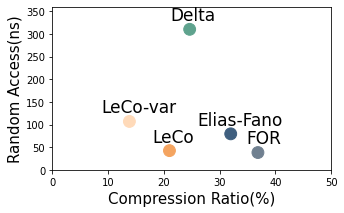

In [218]:
from matplotlib.patches import ConnectionPatch
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from brokenaxes import brokenaxes
method_name = ['FOR','Elias-Fano','Delta','LeCo','LeCo-var']
pos = [2,6,3.5,3,5]
category_colors = ['slategray',color_sns[5],color_sns[3],'sandybrown','peachpuff']
plt.figure(figsize=(5, 3))
plt.scatter(cr, ra, label = fix_method, color = category_colors, s=140)
for i in range(len(fix_method)):
    plt.annotate(method_name[i], xy = (cr[i], ra[i]), xytext = (cr[i]-pos[i], ra[i]+20), fontsize=17)
plt.ylabel('Random Access(ns)',fontsize=15)
plt.xlabel('Compression Ratio(%)',fontsize=15)
plt.xlim([0, 50])
plt.ylim([0, 360])

plt.savefig('sketch_tradeoff.pdf', transparent=True,bbox_inches = 'tight')
plt.show()


# Multiple Column

In [220]:
def parse_log(file, col_num, name, choose_col = [], result = []):
    lineitem_res = pd.read_csv(file+'.log',header=None,delimiter=' ')
    total_mes = ["FOR","Delta","Delta_var","Leco", "Leco_var"]
    method = ["FOR_my","delta_my", "piecewise_fix_op_max"]
    tpcds_storesale = []
    for mes in method:
        cr_avg = sum(np.array(lineitem_res.loc[lineitem_res[0]==mes][3]))/col_num
        cr_avg_wo_model = sum(np.array(lineitem_res.loc[lineitem_res[0]==mes][5]))/col_num
        if len(choose_col)!=0:
            cr_avg = sum(np.array(lineitem_res.loc[lineitem_res[0]==mes][3])[choose_col])/len(choose_col)
            cr_avg_wo_model = sum(np.array(lineitem_res.loc[lineitem_res[0]==mes][5])[choose_col])/len(choose_col)
        tpcds_storesale.append(cr_avg)
#         print(mes, cr_avg)
    lineitem_res = pd.read_csv(file+'_auto.log',header=None,delimiter=' ')
    method = ["delta_cost","leco_cost"]
    for mes in method:
        cr_avg = sum(np.array(lineitem_res.loc[lineitem_res[0]==mes][3]))/col_num
        cr_avg_wo_model = sum(np.array(lineitem_res.loc[lineitem_res[0]==mes][5]))/col_num
        if len(choose_col)!=0:
            cr_avg = sum(np.array(lineitem_res.loc[lineitem_res[0]==mes][3])[choose_col])/len(choose_col)
            cr_avg_wo_model = sum(np.array(lineitem_res.loc[lineitem_res[0]==mes][5])[choose_col])/len(choose_col)
        tpcds_storesale.append(cr_avg)
#         print(mes, cr_avg)
    result.append([tpcds_storesale[0],tpcds_storesale[1],tpcds_storesale[3],tpcds_storesale[2],tpcds_storesale[4]])


In [221]:
def create_multi_bars_cr(labels, datas, tick_step=1.5, group_gap=0.18, bar_gap=0, pdf_name = 'fig'):
    codec = ['FOR','Delta-fix','Delta-var','LeCo-fix','LeCo-var']
#     category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, len(datas)))
    category_colors = ['slategray','seagreen','darkseagreen','sandybrown','peachpuff']
    category_colors = [color_sns[5],color_sns[3],color_sns[1],'sandybrown','peachpuff']
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2 
    xhline_ind = 0.92 / len(labels)
    plt.figure(figsize=(46.5,6.2))
#     plt.figure(figsize=(16, 5.2))
#     plt.figure(figsize=(42, 4.7))
    leco_enhance = []
    leco_var_enhance = []
    for i in range(len(labels)):
        leco_enhance.append(round((datas[0][i] - datas[3][i])*100.0/datas[0][i],1))
        leco_var_enhance.append(round((datas[0][i] - datas[4][i])*100.0/datas[0][i],1))
    leco_text = []
    for item in datas[3]:
        leco_text.append(item)
    if len(labels)>3:
        leco_text[0]+=3
        leco_text[1]+=2
        leco_text[2]-=15
        leco_text[3]+=2
        leco_text[4]-=2
        leco_text[5]+=2
        leco_text[6]-=2
        leco_text[7]-=0
        leco_text[8]-=2
    else:
        leco_text[0]+=3
        leco_text[1]+=3
        leco_text[2]+=4
    for index, y in enumerate(datas):
#         print(y)
        plt.bar(baseline_x + index*bar_span, y, bar_width, label=codec[index], color = category_colors[index] )
        if index == 3:
            for i in range(len(y)):
                plt.text(baseline_x[i] + index*bar_span -0.2,leco_text[i]+5, str(leco_enhance[i])+"%",fontsize = 40)
        if index == 4:
            for i in range(len(y)):
                plt.text(baseline_x[i] + index*bar_span -0.15,y[i]+0.5, str(leco_var_enhance[i])+"%",fontsize = 40)
                
       
    #   plt.ylabel('Compression Ratio(%)',fontsize=30)
    plt.ylim([0,73])
#     if len(labels)>3:
#         plt.legend(fontsize=40,ncol=5,borderaxespad=0.1,loc=2)
    ax = plt.gca()
    ymajorLocator = MultipleLocator(20)
    ax.yaxis.set_major_locator(ymajorLocator)
    plt.xlim([min(baseline_x)-0.2, max(baseline_x)+1.5])
    plt.yticks(fontsize=40)
    plt.xticks(ticks, labels, fontsize=53)
    plt.tight_layout()
    plt.savefig('{}.pdf'.format(pdf_name),dpi=500, transparent=True)
    plt.show()
    

In [222]:
avg_sortedness = [0.23709459459459462, 0.3161271271271272,0.506024024024024, 0.8114264264264265, 0.07076907210240545, 0.7817727727727728,0.4501171171171171,0.984377977977978,0.19401668335001662]
table_name = ['lineitem_3_0','partsupp', 'orders',
             'inventory', 'catalog_sales_all', 'date_dim_all',
             'allCountries_all', 'GRXEUR_opensort', 'course_info']
cols = [8, 4, 3, 4,33,16, 4, 5,6]
result = []
FOR = []
Delta = []
Delta_var = []
Leco = []
Leco_var = []
for i in range(len(table_name)):
    parse_log(base_path+'/build/'+table_name[i], cols[i], table_name,choose_col = [],result=result)
for l in result:
    FOR.append(l[0])
    Delta.append(l[1])
    Delta_var.append(l[2])
    Leco.append(l[3])
    Leco_var.append(l[4])

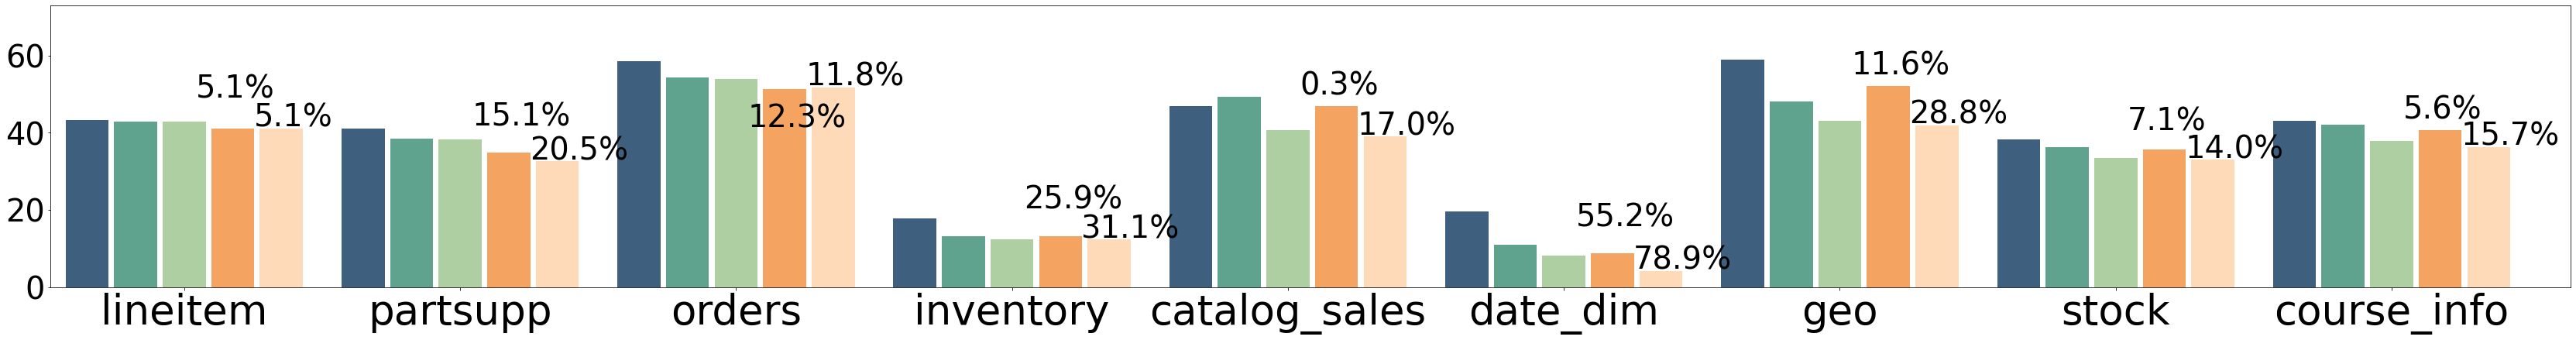

In [223]:
label = ['lineitem 0.24\n 725MB (8/16) ','partsupp 0.32\n 114MB (4/5)','orders 0.51\n 164MB (3/9)','inventory 0.81\n 226MB (4/4)' ,'catalog_sales 0.07\n 283MB (33/34)','date_dim 0.78\n 10MB (16/28)','geo 0.45\n 1.5GB (4/17)','stock 0.98\n 9MB (5/6)','course_info 0.19\n 73MB (6/6)']
label = ['lineitem','partsupp','orders','inventory' ,'catalog_sales','date_dim','geo','stock','course_info']
total_cr =  [FOR,Delta, Delta_var, Leco, Leco_var]
create_multi_bars_cr(label, total_cr, bar_gap=0.03,pdf_name = 'Multicol_total_all')

In [189]:
#0.1
filter_col = [
    [0,5],
    [0,3],
    [0,2],
    [],
    [4,8,17,22,23,24,25,27,28,29,30,31,32],
    [0,2,11,14,15],
    [0,1,2],
    [],
    [0]
]
result = []
FOR = []
Delta = []
Delta_var = []
Leco = []
Leco_var = []
for i in range(len(table_name)):
    parse_log(base_path+'/build/'+table_name[i], cols[i], table_name,choose_col = filter_col[i],result=result)
for l in result:
    FOR.append(l[0])
    Delta.append(l[1])
    Delta_var.append(l[2])
    Leco.append(l[3])
    Leco_var.append(l[4])


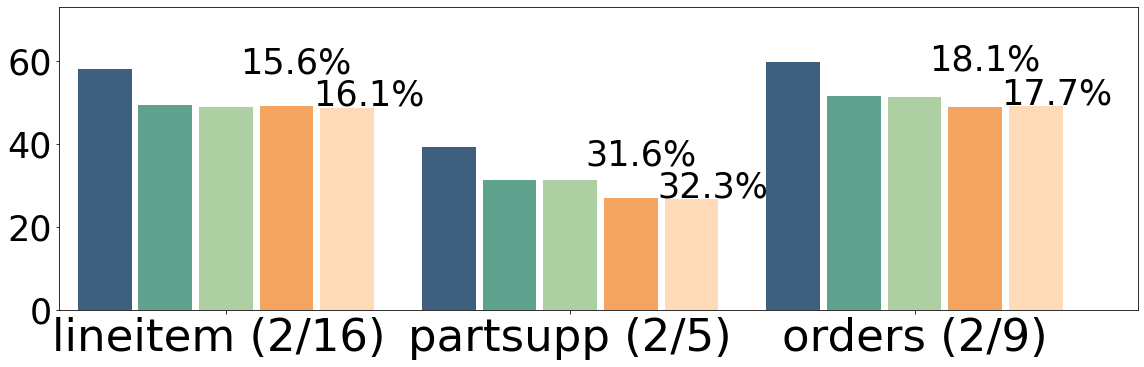

In [175]:
label = ['lineitem\n (2/16) ','partsupp\n (2/5)','orders\n (2/9)','inventory\n (0/4)' ,'catalog_sales\n (13/34)','date_dim\n (5/28)','geo\n (3/17)','stock\n (5/6)','course_info\n (1/6)']
label = ['lineitem (2/16) ','partsupp (2/5)','orders (2/9)']

total_cr =  [FOR[:3],Delta[:3], Delta_var[:3], Leco[:3], Leco_var[:3]]
create_multi_bars_cr(label, total_cr, bar_gap=0.03,pdf_name = 'Multicol_total_filtered_0.1_tpch')

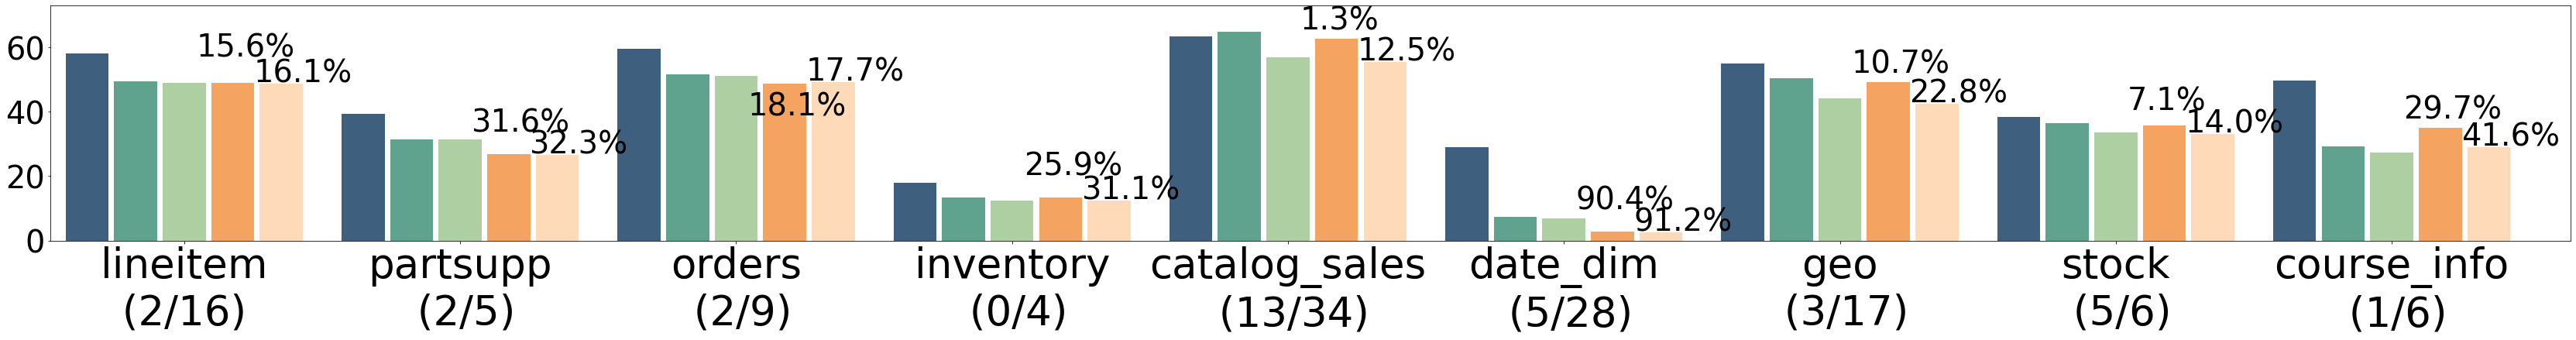

In [192]:
label = ['lineitem\n (2/16) ','partsupp\n (2/5)','orders\n (2/9)','inventory\n (0/4)' ,'catalog_sales\n (13/34)','date_dim\n (5/28)','geo\n (3/17)','stock\n (5/6)','course_info\n (1/6)']

total_cr =  [FOR,Delta, Delta_var, Leco, Leco_var]
create_multi_bars_cr(label, total_cr, bar_gap=0.03,pdf_name = 'Multicol_total_filtered_0.1')

## LP

In [224]:
def create_multi_bars(labels, datas, tick_step=1.5, group_gap=0.15, bar_gap=0):
    codec = ['Leco_fix','Leco_fix_lp','Leco_cost','Leco_cost_lp']
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.6, 0.9, len(codec)))
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2
    xhline_ind = 0.92 / len(labels)
    plt.figure(figsize=(18, 6))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label =codec[index],color = category_colors[index] )
    for i in range(len(labels)):
        plt.axhline(y=datas[1][i], xmin= xhline_ind*i+0.04, xmax=xhline_ind*(i+0.55)+0.04, c="grey", ls="--", lw=1.5)
        plt.axhline(y=datas[-1][i], xmin= xhline_ind*(i+0.52)+0.03, xmax=xhline_ind*(i+1)+0.04, c="grey", ls="--", lw=1.5)
    
    plt.ylabel('Compression Rate(%)',fontsize=28)
    plt.legend(fontsize=20)
    plt.yticks(fontsize=18)
    plt.xticks(ticks, labels, fontsize=25)
    plt.show()


In [225]:
datasets = ['facebook','newman','house_price','movieid']
leco_fix_cr = [41.0356, 7.06652, 20.7375, 43.6836]
leco_fix_lp_cr = [40.6522, 6.77908, 19.7018, 43.4306]
leco_auto_cr = [39.1315, 3.71019, 5.78325, 34.7282]
leco_auto_lp_cr = [38.6585, 3.41695, 4.295, 33.2288]

In [226]:
enhancement_lp =[]
for i in range(len(leco_fix_cr)):
    enhancement_lp.append(100.0 * (leco_fix_cr[i] - leco_fix_lp_cr[i])/ leco_fix_cr[i])
enhancement_lp

[0.9343106960785311, 4.067631592353793, 4.994333936106098, 0.57916472085634]

In [227]:
enhancement_lp =[]
for i in range(len(leco_fix_cr)):
    enhancement_lp.append(100.0 * (leco_auto_cr[i] - leco_auto_lp_cr[i])/ leco_auto_cr[i])
enhancement_lp

[1.208744873056249, 7.9036383581433824, 25.733800198850126, 4.31752869426]

## DP

In [228]:
def create_multi_bars(labels, datas, tick_step=1.5, group_gap=0.15, bar_gap=0):
    codec = ['Leco_cost','Leco_dp']
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.6, 0.9, len(codec)))
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2
    xhline_ind = 0.92 / len(labels)
    plt.figure(figsize=(10, 6))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label =codec[index],color = category_colors[index] )
    for i in range(len(labels)):
        plt.axhline(y=datas[1][i], xmin= xhline_ind*i+0.04, xmax=xhline_ind*(i+0.55)+0.04, c="grey", ls="--", lw=1.5)
        plt.axhline(y=datas[-1][i], xmin= xhline_ind*(i+0.52)+0.03, xmax=xhline_ind*(i+1)+0.04, c="grey", ls="--", lw=1.5)
    
    plt.ylabel('Compression Rate(%)',fontsize=28)
    plt.legend(fontsize=20)
    plt.yticks(fontsize=18)
    plt.xticks(ticks, labels, fontsize=25)
    plt.show()
datasets = ['facebook','house_price','movieid']
leco_cost_cr = [39.1315, 5.812, 34.7282]
leco_fix_dp_cr = [38.61, 5.791, 33.689]
# create_multi_bars(datasets, [leco_cost_cr,leco_fix_dp_cr], bar_gap=0.03)


In [229]:
enhancement_dp =[]
for i in range(len(leco_cost_cr)):
    enhancement_dp.append(100.0 * (leco_cost_cr[i] - leco_fix_dp_cr[i])/ leco_cost_cr[i])
enhancement_dp

[1.3326859435493226, 0.3613214039917396, 2.9923808317160145]

# Compression Throughput

In [230]:
fix_method  = ['FOR_my','Elias-Fano','delta_my','delta_cost','piecewise_fix_op_max','leco_cost']
plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt','ml_timestamp.txt','books_200M_uint32.txt','fb_200M_uint64','wiki_200M_uint64']
size = [200000000, 200000000, 14057565, 200000000, 200000000, 200000000]
# portion = size / sum(size)
avg_compression_throughput = []
std_cth = []
for codec in fix_method:
    test = total.loc[total['method'] == codec]
    data_cols = []
    for data in plot_dataset:
        data_cols.append(float(test.loc[test['dataset']==data]['compression_throughput']))
    print(codec, data_cols)
    std_cth.append(np.std(data_cols))
    avg_speed = 0
    for i in range(len(data_cols)):
        avg_speed += (size[i]/sum(size))*data_cols[i]
    avg_compression_throughput.append(avg_speed)
avg_compression_throughput
for i in range(len(fix_method)):
    print(avg_compression_throughput[i],std_cth[i],std_cth[i]/avg_compression_throughput[i])
    

FOR_my [0.567605, 0.578348, 0.926088, 0.554442, 1.0903, 1.24266]
Elias-Fano [0.44651, 0.443228, 0.731707, 0.43959, 0.760396, 0.835925]
delta_my [1.12922, 1.28003, 0.895401, 1.00312, 0.967077, 0.856196]
delta_cost [0.0382144, 0.0381588, 0.0596988, 0.0302229, 0.0586514, 0.040282]
piecewise_fix_op_max [0.931192, 0.837141, 0.608352, 0.60212, 0.736881, 0.812641]
leco_cost [0.0131688, 0.0135038, 0.0279207, 0.0096284, 0.0270913, 0.0295605]
0.8083264407733304 0.2754750182650668 0.34079674296131934
0.587161754188437 0.16933888082350007 0.28840243700401913
1.0450252474163684 0.1443183521035661 0.1381003496904659
0.04136364759669438 0.011046033851782378 0.2670468997193839
0.7815601156556432 0.11994374487152532 0.15346707498105333
0.01871990083235117 0.008172474246195103 0.4365661078755118


<ipython-input-230-404134158ab6>:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_cols.append(float(test.loc[test['dataset']==data]['compression_throughput']))


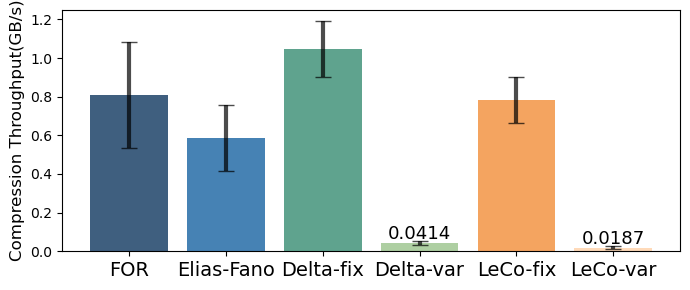

In [22]:
method_name = ['FOR','Elias-Fano','Delta-fix','Delta-var','LeCo-fix','LeCo-var']
category_colors = ['slategray',color_sns[5],color_sns[3],color_sns[1],'gold','lemonchiffon']
category_colors = [color_sns[5],'steelblue',color_sns[3],color_sns[1],'sandybrown','peachpuff']
plt.figure(figsize=(7, 3))
error_params=dict(elinewidth=3,ecolor='black',capsize=6, alpha = 0.7)
plt.bar(method_name,avg_compression_throughput,color = category_colors,yerr=std_cth,error_kw=error_params)
plt.xticks(fontsize=14)
plt.ylabel('Compression Throughput(GB/s)',fontsize=12)
for i in range(len(method_name)):
    if avg_compression_throughput[i]<0.1:
        plt.text(method_name[i], avg_compression_throughput[i], str(Decimal(avg_compression_throughput[i]).quantize(Decimal("0.0000"))),fontsize = 13,ha='center', 
             va='bottom',)
# plt.errorbar(errorbar,y,yerr=error_range,fmt='o:',ecolor='hotpink',elinewidth=3,ms=5,mfc='wheat',mec='salmon',capsize=3)
# plt.axhline(y=avg_compression_throughput[-1], c="grey", ls="--", lw=2)
plt.tight_layout()
plt.savefig('CT_new.pdf',dpi=500, transparent=True)


In [231]:
mix_sin = pd.read_csv(base_path+'/benchmark/bench_mix_sin.log',header=None)
mix_sin

,0,1,2,3,4,5,6,7,8
0,RNS,wave_aug2.txt,10,82.2267,0.0000,82.2267,25.71110,2.627650e+06,0.215054
1,FOR_my,wave_aug2.txt,5000,61.3694,0.5000,60.8694,2.27082,1.138400e+01,0.513347
2,piecewise_fix_op_max,wave_aug2.txt,7043,54.5684,2.8172,51.7512,3.37448,1.324700e+01,0.000000
3,Poly_fix_op_max,wave_aug2.txt,7043,42.2546,4.2258,38.0288,2.82161,1.275110e+01,0.148446
4,leco_cost,wave_aug2.txt,29818,50.4534,8.9454,41.5080,4.07100,3.739400e+01,0.008512
5,poly_cost,wave_aug2.txt,11805,41.8330,7.0830,34.7500,3.57604,6.533600e+01,0.001550
6,sin,wave_aug2.txt,0,36.7000,0.0000,0.0000,0.00000,0.000000e+00,0.000000
7,twosin,wave_aug2.txt,0,25.8000,0.0000,0.0000,0.00000,0.000000e+00,0.000000
8,twosin_w_freq,wave_aug2.txt,0,21.1000,0.0000,0.0000,0.00000,0.000000e+00,0.000000


In [232]:
methods = ['RNS','FOR_my','piecewise_fix_op_max','leco_cost','Poly_fix_op_max','poly_cost','sin','twosin','twosin_w_freq']
result= []
for codec in methods:
    test = mix_sin.loc[mix_sin[0] == codec][3]
    result.append(float(test))
result

<ipython-input-232-660a01743a37>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  result.append(float(test))


[82.2267, 61.3694, 54.5684, 50.4534, 42.2546, 41.833, 36.7, 25.8, 21.1]

In [233]:
result_wo_model = []
for codec in methods:
    test = mix_sin.loc[mix_sin[0] == codec][5]
    result_wo_model.append(float(test))
result_wo_model

<ipython-input-233-206a4a5f931f>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  result_wo_model.append(float(test))


[82.2267, 60.8694, 51.7512, 41.508, 38.0288, 34.75, 0.0, 0.0, 0.0]

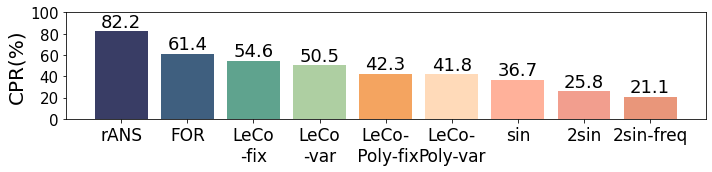

In [234]:
method_name = ['rANS','FOR','LeCo\n-fix','LeCo\n-var','LeCo-\n Poly-fix','LeCo-\nPoly-var','sin','2sin','2sin-freq']
category_colors = [color_sns[6],color_sns[5],color_sns[3],color_sns[1],'sandybrown','peachpuff','#ffb19a','#f29e8e','darksalmon']
plt.figure(figsize=(10, 2.5))
plt.bar(method_name,result,color = category_colors)
plt.ylabel('CPR(%)',fontsize=20)
# plt.axhline(y=result[-2], xmin= 0, xmax=1, c="grey", ls="--", lw=1.5)
plt.xticks(fontsize=17)
for i in range(len(result)):
    plt.text(method_name[i], result[i]+0.3, str(Decimal(result[i]).quantize(Decimal("0.0"))),fontsize = 18,ha='center', 
             va='bottom',)
plt.ylim([0,100])
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('Poly_mix_sin.pdf',dpi=500, transparent=True)


# Partition(Leco+FITing v.s. Leco_cost)

In [235]:
Leco_fit = pd.read_csv(base_path+'/benchmark/piecewise_fiting_bench.log')

In [236]:
plot_dataset = ['normal_200M_uint32.txt','house_price.txt','books_200M_uint32.txt','movieid.txt']
label = ['normal','house_price','booksale','movieid']
Leco_cost_cr =  process_plot_data(plot_dataset,['leco_cost'],auto_int, 'cr')
Leco_cost_cr = np.array(Leco_cost_cr).flatten()
Leco_cost_cr

array([ 2.56578,  5.78325, 23.6758 , 34.8087 ])

In [237]:
plot_dataset = ['normal_200M_uint32.txt','house_price.txt','books_200M_uint32.txt','movieid.txt']
label = ['normal','house_price','booksale','movieid']
Leco_fix_cr =  process_plot_data(plot_dataset,['piecewise_fix_op_max'],fix_int, 'cr')
Leco_fix_cr = np.array(Leco_fix_cr).flatten()

In [238]:
Leco_fix_cr

array([ 6.70318, 20.7375 , 24.6288 , 43.6836 ])

In [241]:
Leco_fiting_cr = process_plot_data(plot_dataset,['piecewise_fiting'],Leco_fit, 'cr')
Leco_fiting_cr = np.array(Leco_fiting_cr).flatten()
Leco_fiting_cr

array([ 9.53755,  6.305  , 27.663  , 43.0724 ])

In [242]:
DAG = np.array([6.41722,9.65725,24.3428,54.4521])
DAG

array([ 6.41722,  9.65725, 24.3428 , 54.4521 ])

In [243]:
sim_piece = np.array([10.8,16.9, 27.5, 44.8])

In [244]:
def create_multi_bars(labels, datas, tick_step=1.5, group_gap=0.15, bar_gap=0):
    codec = ['LeCo-fix','LeCo-PLA','Leco-la-vec','Sim-Piece','LeCo-var']
    category_colors = [[0.8423298817793848, 0.8737404427964184, 0.7524954030731037],[0.3720866446574984, 0.6378633419526029, 0.5550368905837924],color_sns[4],color_sns[5],color_sns[6]]
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2
    plt.figure(figsize=(5.4, 3.35))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label = codec[index],color = category_colors[index] )
        for i in range(len(y)):
            if y[i] > 60:
                plt.text(baseline_x[i] + index*bar_span-0.5, 50,str('{:.1f}'.format(y[i])),fontsize = 13)
    plt.ylabel('Compression Ratio(%)',fontsize=17)
    plt.legend(fontsize=14,ncol=1,loc=2)
    plt.yticks(fontsize=13)
    plt.xticks(ticks, labels, fontsize=16)
    plt.ylim([0, 60])
    plt.tight_layout()
    plt.savefig('partition_cost_Fiting.pdf',dpi=500, transparent=True)
    plt.show()


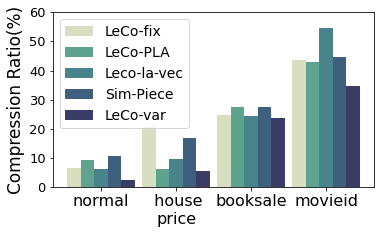

In [245]:
data_name = ['normal',' house\nprice','booksale','movieid']
create_multi_bars(data_name,[Leco_fix_cr,Leco_fiting_cr,DAG,sim_piece,Leco_cost_cr])

In [19]:
(Leco_fiting_cr -Leco_cost_cr)/Leco_cost_cr *100.0

array([722.39708783,  16.84082481,  23.74032929,   9.02174383])

In [97]:
(DAG -Leco_cost_cr)/DAG *100.0

array([60.01726604,  2.74002991, 36.07464175, 40.11493955])

## Fix length partitioning

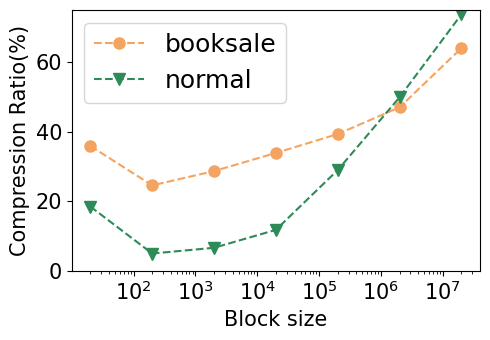

In [327]:
normal = [
    18.5524,
    5.05246,
    6.70318,
    11.8552,
    29.0333,
    49.9377,
    73.75,
    
]
books=[
    35.9475,
    24.6288,
    28.7349,
    33.9434,
    39.3645,
    47.0627,
    64.0625, 
    
]

label = ['booksale','normal']
dataset = [books, normal, ]
mark_style = ['o','v']
colors = ['sandybrown','seagreen']
plt.figure(figsize=(5, 3.5))
for i in range(len(dataset)):
    plt.plot([20,200,2000,20000,200000,2000000,20000000],dataset[i],ls='--',marker=mark_style[i],label = label[i], c = colors[i],ms=8)

plt.ylabel('Compression Ratio(%)',fontsize=15)
plt.xlabel('Block size',fontsize=15)
plt.ylim([0,75])
ax = plt.gca()
ymajorLocator = MultipleLocator(20)
ax.yaxis.set_major_locator(ymajorLocator)
ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='x')
ax.set_xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig('fix_partition_Ushape.pdf',dpi=500, transparent=True)


## hyper-parameter search

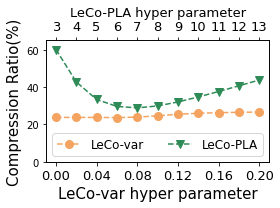

In [167]:
leco_cost = [
    23.7643,
    23.7643,
    23.7643,
    23.6758,
    23.9237,
    24.6197,
    25.4671,
    25.974,
    26.3053,
    26.4933,
    26.6175
]
leco_fiting=[
    60.1165,
    42.7799,
    33.3731,
    29.6517,
    28.8748,
    29.9143,
    32.0348,
    34.702,
    37.6265,
    40.6707,
    43.7648
]
leco_cost_x = [
    0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2
]
leco_fiting_x = [
    3,4,5,6,7,8,9,10,11,12,13
]
label = ['LeCo-var','LeCo-PLA']
dataset = [leco_cost, leco_fiting]
mark_style = ['o','v']
colors = ['sandybrown','seagreen']
plt.figure(figsize=(4, 3))
ax = plt.gca()  

ax3_share_y = ax.twiny()
ax3_share_y.set_xlabel("LeCo-PLA hyper parameter",fontsize=13)

ln1 = ax.plot(leco_cost_x, leco_cost,ls='--',marker='o',label = 'LeCo-var', c = 'sandybrown',ms=8)
ax.set_xticks(leco_cost_x)
x_major_locator=MultipleLocator(0.04)
ax.xaxis.set_major_locator(x_major_locator)
ax.xaxis.set_tick_params(labelsize=13)

ln2 = ax3_share_y.plot(leco_fiting_x, leco_fiting,ls='--',marker='v',label = 'LeCo-PLA', c = 'seagreen',ms=8)
plt.xticks(leco_fiting_x,fontsize=13)
ax.set_xlabel('LeCo-var hyper parameter',fontsize=15)
ax.set_ylabel('Compression Ratio(%)',fontsize=15)
# plt.title('Rocksdb index block',fontsize=23)
plt.ylim([0,65])

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,fontsize = 12,ncol=2,loc=8)
# ax = plt.gca()
# ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
plt.tight_layout()
plt.savefig('tau_search.pdf',dpi=500, transparent=True)
plt.show()


# Data Distribution

In [91]:
def data_distribution(data,name, box_pos,length=100):
    index = [i for i in range(len(data))]
    N = len(index)
    
    fig, ax = plt.subplots(1, 1,figsize=(5, 4.5))
    ax.plot(index, data, linewidth=3)

    axins = ax.inset_axes(box_pos)
    axins.plot(index, data, color='#4169E1',linewidth=2.5)

    zone_left = int(N * 0.2)
    zone_right = int(N * 0.2)+length


    x_ratio = 0 
    y_ratio = 0.05  

    xlim0 = index[zone_left]-(index[zone_right]-index[zone_left])*x_ratio
    xlim1 = index[zone_right]+(index[zone_right]-index[zone_left])*x_ratio

    y = np.hstack((data[zone_left:zone_right], data[zone_left:zone_right],))
    ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
    ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio


    axins.set_xlim(xlim0, xlim1)
    axins.set_ylim(ylim0, ylim1)
    axins.set_xticks([])
    axins.set_yticks([])


    ax.set_xticks([0,max(index)+1])
    ax.set_yticks([0,max(data)+1])
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.tick_params(axis='y', labelrotation = 90)
    def formatnum(x, pos):
        return '%.2g' % (x)
    formatter = FuncFormatter(formatnum)
    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_formatter(formatter)

    tx0 = xlim0
    tx1 = xlim1
    ty0 = ylim0
    ty1 = ylim1
    sx = [tx0,tx1,tx1,tx0,tx0]
    sy = [ty0,ty0,ty1,ty1,ty0]
    ax.plot(sx,sy,"black")

    xy = (xlim0,ylim0)
    xy2 = (xlim0,ylim0)
    con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
            axesA=axins,axesB=ax)
    axins.add_artist(con)

    xy = (xlim1,ylim0)
    xy2 = (xlim0,ylim1)
    con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
            axesA=axins,axesB=ax)
    axins.add_artist(con)
    plt.title(name, fontsize= 40)
    plt.tight_layout()
    plt.savefig('distribution'+str(name)+'.pdf',dpi=500, transparent=True)

    plt.show()


In [ ]:
plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt']
data_name = ['linear','normal']
for i in range(len(plot_dataset)):
    name = plot_dataset[i]
    dataset = base_path+'/data/'+name
    data = list(np.loadtxt(dataset,dtype=np.int64))
#     data = [int(item[:-1]) for item in ff.readlines()]
    data_distribution(data,data_name[i],(0.5, 0.1, 0.4, 0.3))


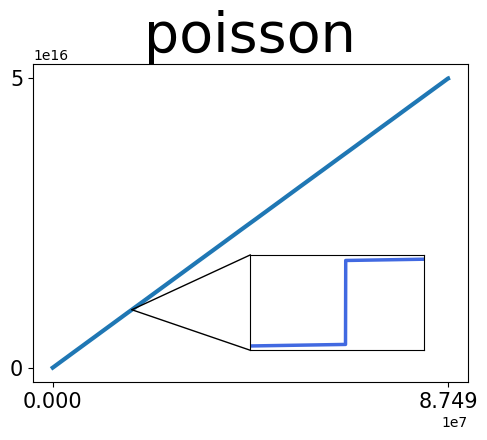

In [9]:
plot_dataset = ['poisson_randomdie.txt']
data_name = ['poisson']
for i in range(len(plot_dataset)):
    name = plot_dataset[i]
    dataset = base_path+'/data/'+name
    ff = open(dataset,'r')
    data = [int(item[:-1]) for item in ff.readlines()]
    data_distribution(data,data_name[i],(0.5, 0.1, 0.4, 0.3),1600)


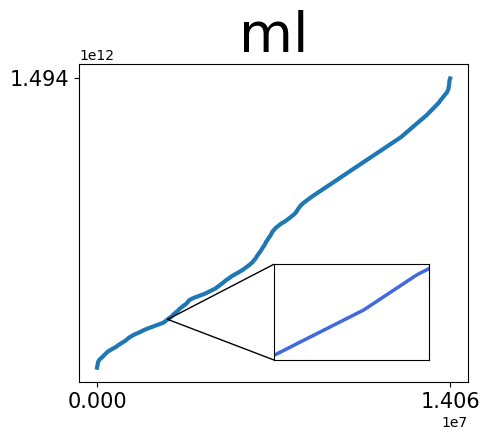

In [336]:
plot_dataset = ['ml_timestamp.txt']
data_name = ['ml']
for i in range(len(plot_dataset)):
    name = plot_dataset[i]
    dataset = base_path+'/data/'+name
    ff = open(dataset,'r')
    data = [int(item[:-1]) for item in ff.readlines()]
    data_distribution(data,data_name[i],(0.5, 0.07, 0.4, 0.3),1600)


# movieid

In [246]:
ff = open(base_path+'/data/movieid.txt','r')
df = [int(item[:-1]) for item in ff.readlines()]

In [247]:
min_idx= 959
max_idx = 2000

In [248]:
piecewise= []
piecewise_idx = []
with open('movieid_segments.log','r')as f:
    l = f.readlines()
    for item in l:
        item= item[:-1]
        item = item.split(' ')
#         print(item)
        if int(item[0])< min_idx:
            continue
        if int(item[1])>max_idx:
            break
        last = float(item[2]) + (int(item[1])-int(item[0]))*float(item[3])
                            
        piecewise.append([int(float(item[2])),int(last)])
        piecewise_idx.append([int(item[0])+1,int(item[1])+1])

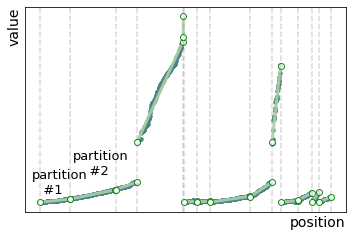

In [249]:
max_idx = piecewise_idx[-1][1]
groundtruth = df[min_idx:max_idx]
index = [i for i in range(min_idx, max_idx)]
plt.figure(figsize=(5, 3.4))
plt.scatter(index,groundtruth, s=12, color=color_sns[4])
for i in range(len(piecewise)):
    if piecewise_idx[i][0]==173:
        continue
    plt.axvline(piecewise_idx[i][0],linestyle = "--", color = 'grey', alpha=0.3)
    plt.plot(piecewise_idx[i],piecewise[i],color = color_sns[1],linewidth=3, alpha=0.9,marker='o',mec='g',ms=6, mfc='w')
plt.text(piecewise_idx[0][0]-30, piecewise[0][0]+4000,'partition\n   #1',fontsize=13)
plt.text(piecewise_idx[1][0]+10, 12200,'partition\n    #2',fontsize=13)
plt.axvline(piecewise_idx[-1][1],linestyle = "--", color = 'grey', alpha=0.3)
plt.yticks([])
plt.xticks([])
plt.xlabel("position",horizontalalignment='right',x=1,fontsize=14)
plt.ylabel("value",horizontalalignment='right',y=1,fontsize=14)
plt.tight_layout()
plt.savefig('movieid_adaptive.pdf',dpi=500, transparent=True)
plt.show()

In [250]:
ff = open(base_path+'/data/movieid.txt','r')
df = [int(item[:-1]) for item in ff.readlines()]
min_idx= 1000
max_idx = 2000
piecewise= []
piecewise_idx = []
with open('movieid_segment_fix.log','r')as f:
    l = f.readlines()
    for item in l:
        item= item[:-1]
        item = item.split(' ')
        if int(item[0])< min_idx:
            continue
        if int(item[1])>max_idx:
            break
        last = float(item[2]) + (int(item[1])-int(item[0]))*float(item[3])
                            
        piecewise.append([int(float(item[2])),int(last)])
        piecewise_idx.append([int(item[0]),int(item[1])])

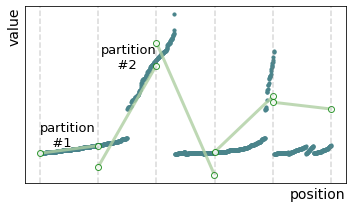

In [251]:
groundtruth = df[min_idx:max_idx]
index = [i for i in range(min_idx, max_idx)]
plt.figure(figsize=(5, 3))
plt.scatter(index,groundtruth, s=10, color= color_sns[4])


for i in range(len(piecewise)):
    if piecewise_idx[i][0]==173:
        continue
    
    plt.axvline(piecewise_idx[i][0],linestyle = "--", color = 'grey', alpha=0.3)
    plt.plot(piecewise_idx[i],piecewise[i],color = color_sns[1],linewidth=3, alpha=0.8,marker='o',mec='g',ms=6, mfc='w')
plt.text(piecewise_idx[0][0], piecewise[0][0]+4000,'partition\n   #1',fontsize=13)
plt.text(piecewise_idx[1][0]+10, 50200,'partition\n    #2',fontsize=13)
plt.axvline(max_idx,linestyle = "--", color = 'grey', alpha=0.3)
plt.yticks([])
plt.xticks([])
plt.xlabel("position",horizontalalignment='right',x=1,fontsize=14)
plt.ylabel("value",horizontalalignment='right',y=1,fontsize=14)
plt.tight_layout()
plt.savefig('movieid_fix.pdf',dpi=500, transparent=True)

plt.show()

## case study

In [43]:
def lr(x, y, m):
    sumx = 0
    sumy = 0
    sumxy = 0
    sumxx = 0
    for i in range(m):
        sumx = sumx + x[i]
        sumy = sumy + y[i]
        sumxx = sumxx+x[i]*x[i]
        sumxy = sumxy+x[i]*y[i]
    
    ccc= sumxy * m - sumx * sumy
    xxx = sumxx * m - sumx * sumx

    theta1 = ccc/xxx
    theta0 = (sumy - theta1 * sumx)/m
    return theta0, theta1
    

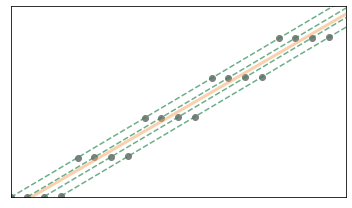

In [73]:
outer_gap = 5000
inner_gap = 50
start = 0
data = []
step = 7
group = 4
plt.figure(figsize=(5, 3))
for i in range(step):
    for j in range(group):
        data.append(start)
        start+= inner_gap
    start+=outer_gap
index = [i for i in range(len(data))]
for i in range(group):
    plt.plot([i,group*(step - 1)+i],[data[i], data[group*(step - 1)+i]],linestyle = '--', color = 'seagreen', alpha=0.7 )
lr_theta0, lr_theta1 = lr(index, data, step*group)
plt.plot([0, step*group-1],[lr_theta0, lr_theta0+lr_theta1*(step*group-1)], color = 'sandybrown', alpha=0.5,linewidth=3, label = 'Default')
plt.xlim([0,20])
plt.ylim([0,25000])
plt.yticks([])
plt.xticks([])
plt.scatter(index,data,color = 'grey') 
plt.tight_layout()
plt.savefig('step_wise.pdf',dpi=500, transparent=True)



## Dictionary + HT

In [255]:
def cal_tps(dict_result):
    lat = [float(dict_result[1][0])]
    tps = []
    for i in range(len(dict_result)-1):
        lat.append(float(dict_result[1][i+1]) - float(dict_result[1][i]))
    for i in range(len(lat)):
        tps.append(151200/lat[i])
    return tps

In [257]:
import glob
file_base = [base_path+'/build/leco_dict_ht_batch_15M*',base_path+'/build/for_dict_ht_batch_15M*',base_path+'/build/raw_dict_ht_batch_15M*']
memory = ['3G','2G','1G','800M','700M','600M','500M']
colors = {
    'leco':'sandybrown',
    'for':color_sns[3],
    'raw':color_sns[5]
}
le= {
    'leco':'LeCo',
    'for':'FOR',
    'raw':'Raw'
}
mark_style = {
    'leco':'o',
    'for':'^',
    'raw':'x'
}
result1 ={}
result2 = {}
for mem in memory:
    for f in file_base:
        for log in glob.glob(f):
            method_name = log.split('/')[-1].split('_')[0]
            memory_name = log.split('/')[-1].split('_')[-1][:-4]
            if memory_name == mem:
                ff = open(log,'r')
                res = ff.readlines()[-1][:-1]
                res = res.split(' ')
                result1.setdefault(method_name,[]).append(1.512000005*8/float(res[-2]))
                result2.setdefault(method_name,[]).append(1.512000005*8/float(res[-1]))


In [258]:
leco_for_ratio = []
for i in range(len(memory)):
    leco_for_ratio.append( result1['leco'][i]/result1['for'][i] )

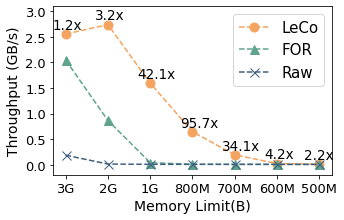

In [259]:
plt.figure(figsize=(5, 3.1))
for item in result1.keys():
    if item == 'leco':
        for i in range(len(result1[item])-1):
            plt.text(i-0.3, result1[item][i]+0.1, str('{:.1f}'.format(leco_for_ratio[i]))+"x",fontsize = 13.5)
        i = len(result1[item])-1
        plt.text(i-0.35, result1[item][i]+0.1, str('{:.1f}'.format(leco_for_ratio[i]))+"x",fontsize = 13.5)
    plt.plot([i for i in range(len(result1[item]))], result1[item], label = le[item],marker=mark_style[item], color = colors[item],ls='--',ms=9)
plt.xticks([i for i in range(len(memory))], memory,fontsize=13)
plt.yticks(fontsize=13)
# plt.title('Dictionary Hash Probe',fontsize=15)
plt.xlabel('Memory Limit(B)',fontsize=14)
plt.ylabel('Throughput (GB/s)',fontsize=14)
plt.ylim([-0.2,3.1])
plt.legend(fontsize=15)
plt.savefig("Dictionary_Hash_Probe.pdf", bbox_inches='tight', pad_inches=0.05, transparent=True)
plt.show()

## Codec Selection

In [271]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
color_sns = sns.cubehelix_palette(8, start=.5, rot=-.75)
def create_multi_bars_cr(labels, datas, tick_step=1.5, group_gap=0.18, bar_gap=0, codec = ['FOR','LeCo','Mix']):
#     category_colors = ['slategray','steelblue','sandybrown','peachpuff','orange']
    category_colors = ['slategray',color_sns[5],color_sns[3],color_sns[1],'sandybrown','peachpuff']
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2 
    xhline_ind = 0.92 / len(labels)
    plt.figure(figsize=(10, 2.5))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label=codec[index], color = category_colors[index] )
#     plt.bar(0, 0, bar_width, bottom = 0, color = 'white',hatch='xxx',label = 'model size')

    plt.ylabel('CPR(%)',fontsize=20)
#     plt.legend(fontsize=13,ncol=9,bbox_to_anchor=(0,1.03,1,0.18),borderaxespad = 0.)
    plt.legend(fontsize=18, ncol=2)
    ax = plt.gca()
    ymajorLocator = MultipleLocator(20)
    ax.yaxis.set_major_locator(ymajorLocator)
    plt.xlim([min(baseline_x)-0.2, max(baseline_x)+1.5])
    plt.yticks(fontsize=11)
#     plt.ylim([0,65])
    plt.xticks(ticks, labels, fontsize=22)
    plt.tight_layout()
    plt.savefig('codec_selection.pdf',dpi=500, transparent=True)
    plt.show()


In [272]:
plot_dataset = ['movieid.txt','poly_200M_uint32.txt','wave_aug1.txt','exp_new2_200M_uint64.txt','pol_log_10M.txt','site1_sort.txt','weights_sort.txt','adult_train.txt']
label = ['movieid','poly','cosmos','exp','polylog','site','weight','adult']
dataset32 = ['linear_200M_uint32.txt','normal_200M_uint32.txt','books_200M_uint32.txt','movieid.txt','house_price.txt','poly_200M_uint32.txt']

In [273]:
FOR = []
Leco = []
ground_truth = []
single_best = []
mix = []
for data in plot_dataset:
    result = mix_result[mix_result[1]==data]
    FOR.append(float(result[result[0]=='FOR'][2]))
    Leco.append(float(result[result[0]=='Leco'][2]))
    ground_truth.append(float(result[result[0]=='groundtruth'][2]))
    single_best.append(float(result[result[0]=='single'][2]))
    mix.append(float(result[result[0]=='mix'][2]))

<ipython-input-273-d90df8bf2b8c>:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  FOR.append(float(result[result[0]=='FOR'][2]))
<ipython-input-273-d90df8bf2b8c>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Leco.append(float(result[result[0]=='Leco'][2]))
<ipython-input-273-d90df8bf2b8c>:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth.append(float(result[result[0]=='groundtruth'][2]))
<ipython-input-273-d90df8bf2b8c>:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  single_best.append(float(result[result[0]=='single'][2]))
<ipython-input-273-d90df8bf2b8c>:12: FutureWarning: Call

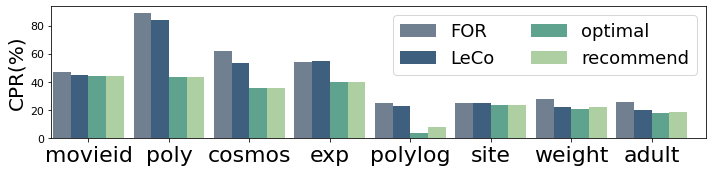

In [266]:
codec = ['FOR','LeCo','optimal','recommend']
create_multi_bars_cr(label,[ FOR, Leco,ground_truth, mix],codec = codec)

## Hardness Plot

In [301]:
file = open(base_path+"/benchmark/bench_result_variance.log",'r')
lines = [item[:-1] for item in file.readlines()]
score_local = {}
score_global = {}
nameset = set()

In [289]:
for item in lines:
    item = item.split(' ')
    nameset.add(item[0].split('/')[-1].split('_')[0])
    data_name = item[0].split('/')[-1].split('_')[0] + '_' + str(item[1])
    score_local[data_name] = float(item[2])
    score_global[data_name] = float(item[4])

In [303]:
file = open(base_path+"/benchmark/bench_data_correct.log",'r')
lines = [item[:-1] for item in file.readlines()]

In [291]:
pgm_score = {}
var_score = {}
avg_cut = {}
for item in lines[1:]:
    item = item.split(' ')
    dataname = item[0].split('/')[-1].split('_')[0]+"_"+item[1]
    pgm_score[dataname] = float(item[2])
    var_score[dataname] = float(item[4])
    avg_cut[dataname] = float(item[5])
    

In [292]:
totaldata = ['house', 'wiki', 'libio', 'books', 'planet', 'ml', 'history', 'fb', 'normal', 'genome', 'linear', 'wise', 'poisson', 'osm', 'covid', 'movieid.txt']
selected = ['house', 'wiki', 'libio', 'books', 'planet', 'ml', 'fb', 'normal', 'linear', 'poisson', 'movieid.txt','osm']

In [295]:
l = []
for name in totaldata:
    global_ = score_global[name+'_'+'4096']
    global_ = avg_cut[name+'_'+'15'] / data_range[name]
    if global_<1:
        l.append(global_)

In [296]:
def activate(x):
    return pow(2,2*(x-0.39775371638957563))
def activate2(x):
    return pow(2,2*(x-0.09209734523124999))

In [297]:
total_global_metric = {}
for name in totaldata:
    l = []
    global_ = 0
    for ep in [7,15,31,63,127,255,511,1024,2048,4096]:
        l.append(score_local[name+'_'+str(ep)])
    global_ = score_global[name+'_'+'4096'] 
    if global_>1:
        global_ = 1
    cut_per_range = avg_cut[name+'_'+'15'] / data_range[name]
    total_global_metric[name] = activate2(global_)+ activate(cut_per_range)
dict(sorted(total_global_metric.items(), key=lambda item: item[1]))

{'linear': 1.4562807257733432,
 'wiki': 1.6142361762799173,
 'libio': 1.6882894396001675,
 'planet': 1.729913585945015,
 'history': 1.7331687638005264,
 'fb': 1.7849976497211937,
 'genome': 1.8771120948907392,
 'wise': 1.8971075018972199,
 'normal': 1.9560899295761662,
 'books': 2.1295374528717845,
 'covid': 2.137118973247118,
 'osm': 2.3190989553969183,
 'ml': 2.791148032336386,
 'movieid.txt': 2.88675646145593,
 'poisson': 3.491905375717077,
 'house': 4.924918488041159}

In [298]:
normalized_local = {}
normalized_global = {}
max_global = 0
max_local = 0
avg_global_hardness = 0
avg_local_hardness = 0
for name in totaldata:
    global_ = total_global_metric[name]
    if global_> max_global:
        max_global = global_
    local_ = score_local[name+'_7']
    if local_ > max_local:
        max_local = local_
for name in totaldata:
    normalized_global[name] = total_global_metric[name]/max_global
    normalized_local[name] = score_local[name+'_7']/max_local
    avg_global_hardness+=normalized_global[name]
    avg_local_hardness+=normalized_local[name]

avg_global_hardness/=len(totaldata)
avg_local_hardness/=len(selected)

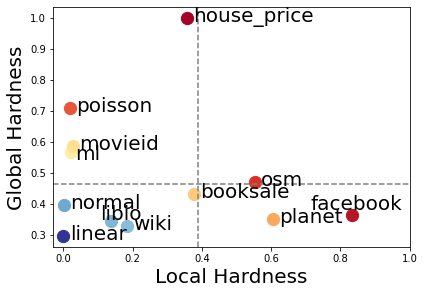

In [299]:
label = {
    'movieid.txt':'movieid',
    'books':'booksale',
    'house':'house_price',
    'fb':'facebook'
}
size_ = 20
plt.figure(figsize=(6, 4.2))
for name in selected:
    labelname = name
    if name in label.keys():
        labelname = label[name]
    plt.scatter(normalized_local[name], normalized_global[name],c =-(normalized_local[name] + normalized_global[name]*2),s=150,vmin=-1.6, vmax=-0.6,cmap='RdYlBu')
    if name == 'libio':
        plt.text(normalized_local[name]-0.03, normalized_global[name]+0.005,str(labelname),fontsize=size_)
    elif name == 'ml':
        plt.text(normalized_local[name]+0.013, normalized_global[name]-0.025,str(labelname),fontsize=size_)
    elif name == 'fb':
        plt.text(normalized_local[name]-0.12, normalized_global[name]+0.018,str(labelname),fontsize=size_)
    else:
        plt.text(normalized_local[name]+0.018, normalized_global[name]-0.012,str(labelname),fontsize=size_)
plt.xlim([-0.03,1])
plt.axhline(y=avg_global_hardness, c="grey", ls="--", lw=1.5)
plt.axvline(x=avg_local_hardness, c="grey", ls="--", lw=1.5)  
plt.xlabel("Local Hardness",fontsize=20)
plt.ylabel("Global Hardness",fontsize=20)
plt.tight_layout()
plt.savefig(base_path+'/scripts/dataset_hardness.pdf',dpi=500, transparent=True)
plt.show()
